In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('/kaggle/input/spaceshipt-df/train.csv')


In [3]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
df = df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', #'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']].copy()\
.reset_index(drop=True)

In [5]:
df.groupby('HomePlanet').size()
# Replace Na Values with the mode of the planets
planets_mode = df['HomePlanet'].mode(dropna=True)[0]
df['HomePlanet'] = df['HomePlanet'].fillna(planets_mode).copy()

# Replacing Planets where Earth equals 2, Europa equals 1 and Mars equals 0
df['HomePlanet']=df['HomePlanet'].replace('Earth',2).replace('Europa',1).replace('Mars',0).copy()



/tmp/ipykernel_17/4262496849.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HomePlanet']=df['HomePlanet'].replace('Earth',2).replace('Europa',1).replace('Mars',0).copy()


In [6]:
cryosleep_mode = df['CryoSleep'].mode(dropna=True)[0]
df['CryoSleep'] = df['CryoSleep'].fillna(cryosleep_mode).copy()


/tmp/ipykernel_17/3772733588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(cryosleep_mode).copy()


In [7]:
# Replacing na values from destination with mode of it!
destination_mode = df['Destination'].mode(dropna=True)[0]
df['Destination'] = df['Destination'].fillna(destination_mode).copy()



In [8]:
#Replacing the values from Destination to numbers
df['Destination'] = df['Destination'].replace('55 Cancri e',2)\
.replace('PSO J318.5-22',1)\
.replace('TRAPPIST-1e',0)\
.copy()



/tmp/ipykernel_17/771644961.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('TRAPPIST-1e',0)\


In [9]:
# Replacing Na values from age by it`s mean
age_mean = round(df['Age'].mean(skipna=True))
df['Age'] = df['Age'].fillna(age_mean).copy()

In [10]:
#Removing VIP , Cabin and NAME rows witha na values
df = df.dropna(subset=['VIP','Cabin','Name']).copy().reset_index(drop=True)


In [11]:
df['Transported'] = df['Transported'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [12]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported
0,0001_01,1,0,B/0/P,0,39.0,False,Maham Ofracculy,0
1,0002_01,2,0,F/0/S,0,24.0,False,Juanna Vines,1
2,0003_01,1,0,A/0/S,0,58.0,True,Altark Susent,0
3,0003_02,1,0,A/0/S,0,33.0,False,Solam Susent,0
4,0004_01,2,0,F/1/S,0,16.0,False,Willy Santantines,1


<Axes: >

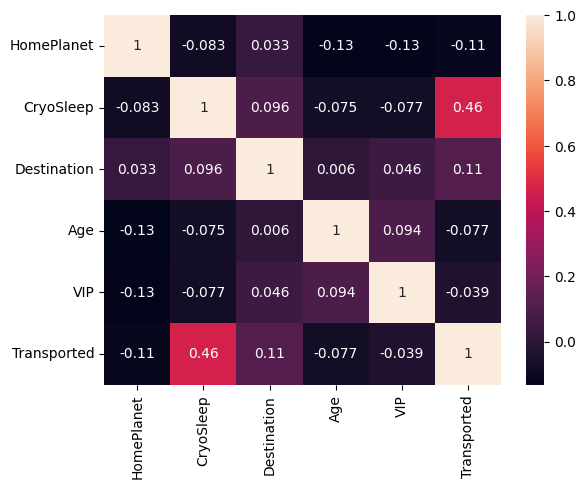

In [13]:
sns.heatmap(df[['HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP',  'Transported']].corr(),annot=True)

In [14]:
model = sm.ols(formula='Transported ~ CryoSleep',data = df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     2215.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:16:02   Log-Likelihood:                -4899.6
No. Observations:                8100   AIC:                             9803.
Df Residuals:                    8098   BIC:                             9817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3340      0.006     54.775      0.000       0.322       0.346
CryoSleep      0.4865      0.010     47.062      0.000       0.466       0.507
==============================================================================
Omnibus:                     1941.100   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.047
Skew:                           0.176   Prob(JB):                     6.64e-84
Kurtosis:                       1.995   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""